In [7]:
import os
import shutil
from glob import glob

# Define Google Drive destination directory
drive_path = "/content/drive/My Drive/Fruits 360"

# Fruits to extract
fruits = ["Banana", "Raspberry", "Strawberry"]

# Define Train and Val directories
train_dir = os.path.join(drive_path, "Train")
val_dir = os.path.join(drive_path, "Val")

# Ensure destination folders exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Filter and copy images
for fruit in fruits:
    # Create folders for each fruit in Train and Val
    fruit_train_dir = os.path.join(train_dir, fruit)
    fruit_val_dir = os.path.join(val_dir, fruit)
    os.makedirs(fruit_train_dir, exist_ok=True)
    os.makedirs(fruit_val_dir, exist_ok=True)

    # Debug: Print the structure of the dataset and paths searched
    print(f"Organizing images for: {fruit}")

    # Paths to training and validation folders in the original dataset
    train_images_path = os.path.join(drive_path, "Train", fruit, "*.jp*g")
    val_images_path = os.path.join(drive_path, "Val", fruit, "*.jp*g")

    # Find all images in the specified paths
    train_images = glob(train_images_path)
    val_images = glob(val_images_path)

    if len(train_images) == 0:
        print(f"Warning: No training images found for {fruit}.")
    if len(val_images) == 0:
        print(f"Warning: No validation images found for {fruit}.")

    print(f"Found {len(train_images)} training images for {fruit}.")
    print(f"Found {len(val_images)} validation images for {fruit}.")

    # Copy Train images
    for img in train_images:
        dest = os.path.join(fruit_train_dir, os.path.basename(img))
        if not os.path.exists(dest):  # Skip if file already exists
            shutil.copy(img, dest)

    # Copy Val images
    for img in val_images:
        dest = os.path.join(fruit_val_dir, os.path.basename(img))
        if not os.path.exists(dest):  # Skip if file already exists
            shutil.copy(img, dest)

print("Data organized and saved to Google Drive in 'Fruits 360' folder.")







Organizing images for: Banana
Found 490 training images for Banana.
Found 166 validation images for Banana.
Organizing images for: Raspberry
Found 490 training images for Raspberry.
Found 166 validation images for Raspberry.
Organizing images for: Strawberry
Found 492 training images for Strawberry.
Found 164 validation images for Strawberry.
Data organized and saved to Google Drive in 'Fruits 360' folder.


Displaying random images for Strawberry (Train)...


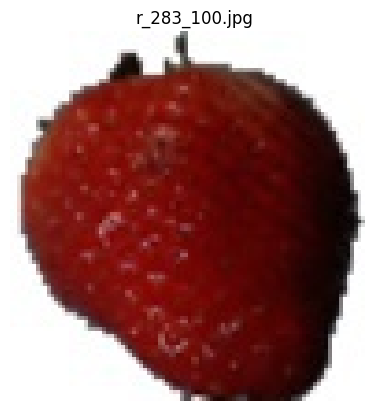

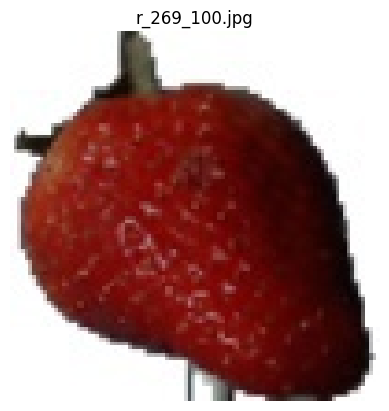

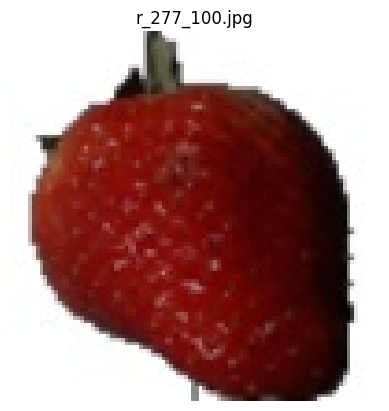

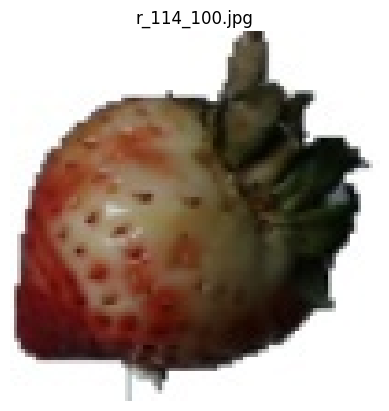

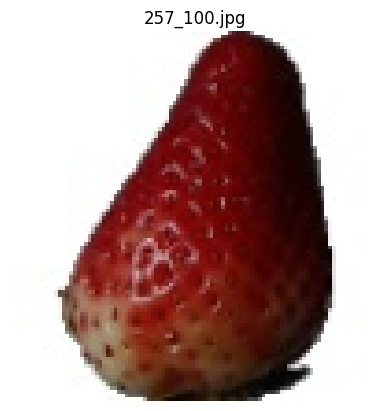

In [8]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

# Define the Google Drive path where the images are stored
drive_path = "/content/drive/My Drive/Fruits 360"

# Function to display random images from a folder
def display_random_images(folder_path, num_images=5):
    # Get all image paths in the folder
    image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.jpg', '.jpeg'))]
    random.shuffle(image_paths)  # Shuffle the list for randomness

    # Select a few images
    selected_images = image_paths[:num_images]

    # Display the images
    for img_path in selected_images:
        img = Image.open(img_path)
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(img_path))
        plt.show()

# Choose a fruit and dataset type (Train/Val) to inspect
fruit_to_inspect = "Strawberry"  # Change to "Raspberry" or "Strawberry" to inspect other fruits
dataset_type = "Train"  # Change to "Val" to inspect validation images

# Construct the folder path
folder_path = os.path.join(drive_path, dataset_type, fruit_to_inspect)

# Display random images
print(f"Displaying random images for {fruit_to_inspect} ({dataset_type})...")
display_random_images(folder_path)


Training images: 1472
Validation images: 496
Found 1472 images belonging to 3 classes.
Found 496 images belonging to 3 classes.
Visualizing random images from train generator:


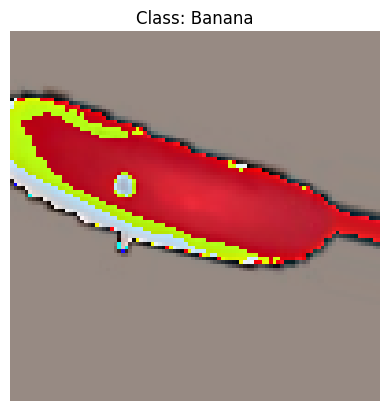

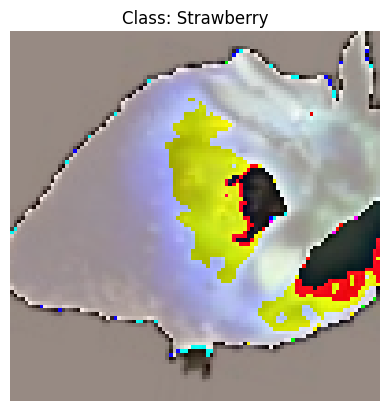

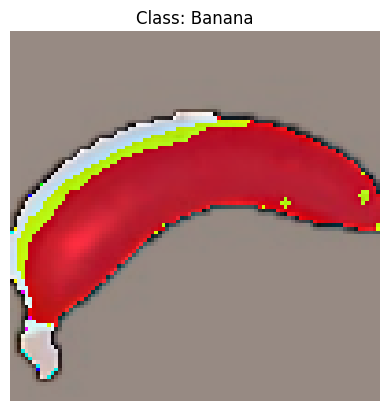

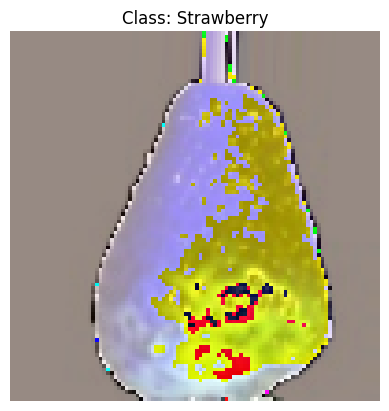

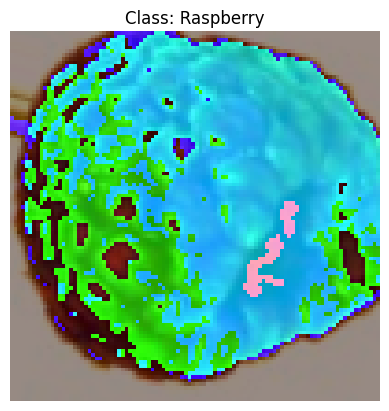

Visualizing random images from valid generator:


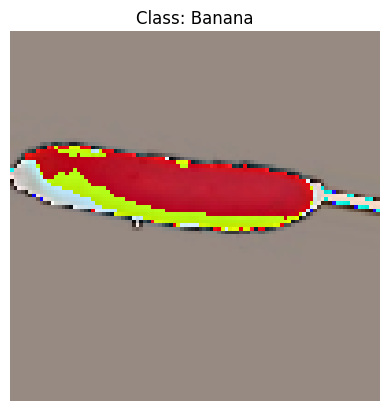

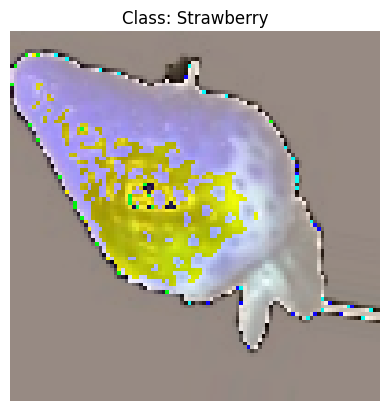

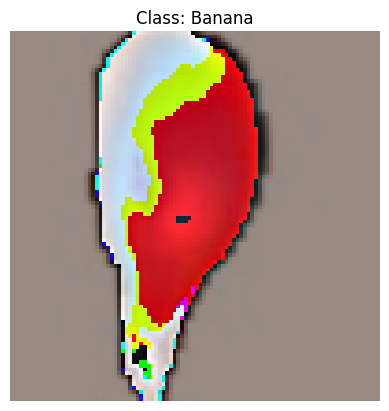

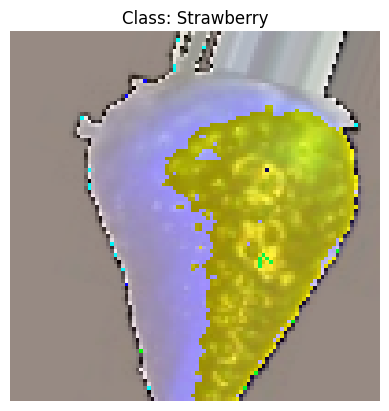

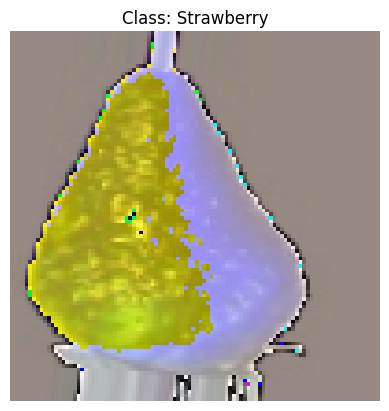

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │          13,827 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,728,515 (56.18 MB)

 Trainable params: 13,827 (54.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Import required libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from __future__ import print_function, division
import os


# Paths to training and validation datasets
train_path = "/content/drive/MyDrive/Fruits 360/Train"
valid_path = "/content/drive/MyDrive/Fruits 360/Val"

# Load all image file paths
image_files = glob(os.path.join(train_path, "**", "*.jp*g"), recursive=True)
valid_image_files = glob(os.path.join(valid_path, "**", "*.jp*g"), recursive=True)

# Ensure all images are loaded
print(f"Training images: {len(image_files)}")
print(f"Validation images: {len(valid_image_files)}")

# Image size and batch size
IMG_SIZE = [100, 100]
BATCH_SIZE = 32
EPOCHS = 5

# Augment data using ImageDataGenerator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

# Generators for training and validation data
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

valid_generator = gen.flow_from_directory(
    valid_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

def visualize_random_images(generator, title):
    class_names = list(generator.class_indices.keys())  # Extract class names
    for _ in range(5):
        img, label = next(generator)  # Use next() to get the next batch
        idx = np.random.choice(img.shape[0])  # Randomly select an image from the batch
        plt.imshow(img[idx].astype("uint8"))  # Display the image
        plt.title(f"Class: {class_names[np.argmax(label[idx])]}")
        plt.axis("off")
        plt.show()


print("Visualizing random images from train generator:")
visualize_random_images(train_generator, "Train Generator")
print("Visualizing random images from valid generator:")
visualize_random_images(valid_generator, "Validation Generator")

# Load pre-trained VGG16 model without the top layer
vgg = VGG16(input_shape=IMG_SIZE + [3], weights='imagenet', include_top=False)

# Freeze all VGG16 layers
for layer in vgg.layers:
    layer.trainable = False

# Number of classes
folders = glob(os.path.join(train_path, "*"))

# Build the model using functional API
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)




Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 361s 7s/step - accuracy: 0.8316 - loss: 2.7177 - val_accuracy: 1.0000 - val_loss: 1.1673e-08
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 44s 953ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 1.0000 - loss: 2.3773e-09 - val_accuracy: 1.0000 - val_loss: 6.2833e-08
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 2.1035
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - accuracy: 1.0000 - loss: 4.0548e-10 - val_accuracy: 1.0000 - val_loss: 1.2418e-09


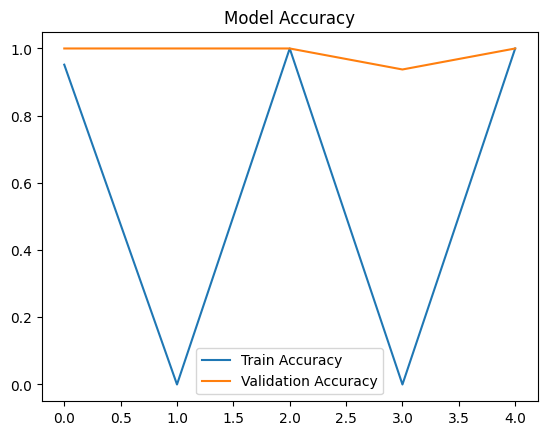

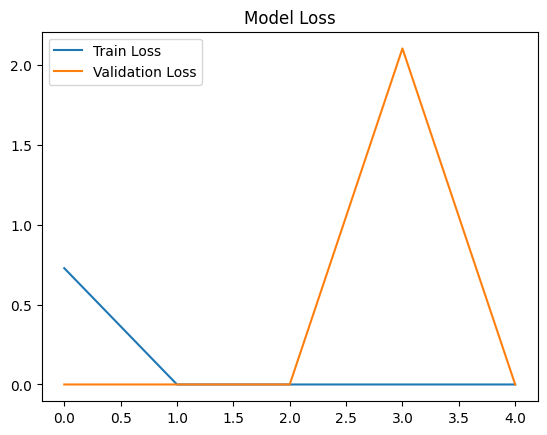

In [10]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(image_files) // BATCH_SIZE,
    validation_steps=len(valid_image_files) // BATCH_SIZE
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

Found 496 images belonging to 3 classes.
Processing batch 1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step 
Processing batch 2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing batch 3...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing batch 4...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing batch 5...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing batch 6...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing batch 7...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processing batch 8...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
Processing batch 9...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       230
         1.0       1.00      0.99      1.00       166
         2.0       0.99      1.00      1.00       164

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



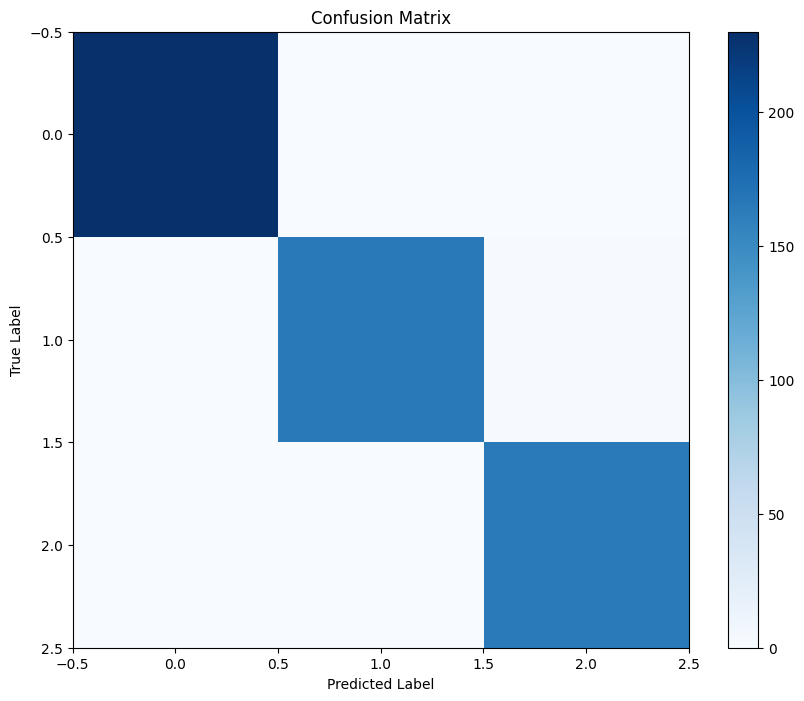

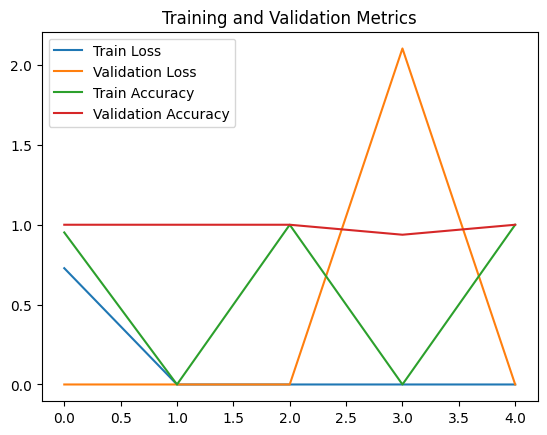

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Initialize lists for predictions and targets
predictions = []
targets = []

# Define the generator with the dataset
data_path = valid_path  # Using validation data for confusion matrix
N = len(valid_generator) * BATCH_SIZE  # Number of samples to process

# Create a new generator for validation data without shuffling
val_gen = gen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    shuffle=False,  # Shuffle must be false for predictions and targets to align
    batch_size=BATCH_SIZE * 2
)

# Loop through the generator to collect predictions and targets
i = 0
for x, y in val_gen:
    i += 1
    print(f"Processing batch {i}...")

    # Predict the class probabilities for the batch
    p = model.predict(x)

    # Convert probabilities to class predictions
    p = np.argmax(p, axis=1)

    # Convert one-hot encoded targets to class indices
    y = np.argmax(y, axis=1)

    # Append to predictions and targets lists
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))

    # Stop when enough samples are processed
    if len(targets) >= N:
        break

# Confusion matrix
cm = confusion_matrix(targets, predictions)

# Print classification report
print("Classification Report:\n", classification_report(targets, predictions))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training/validation accuracy and loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Metrics")
plt.legend()
plt.show()
